Este cuaderno contiene pruebas para conectar la API de sismología de USA

In [62]:
# Imports
import requests
import pandas as pd

In [63]:
"""# Seteo pandas para que emita todas las columnas
pd.set_option('display.max_columns', None)"""

"# Seteo pandas para que emita todas las columnas\npd.set_option('display.max_columns', None)"

El formato de una respuesta típica en formato GeoJson es la siguiente:

{
  type: "FeatureCollection",
  metadata: {
    generated: Long Integer,
    url: String,
    title: String,
    api: String,
    count: Integer,
    status: Integer
  },
  bbox: [
    minimum longitude,
    minimum latitude,
    minimum depth,
    maximum longitude,
    maximum latitude,
    maximum depth
  ],
  features: [
    {
      type: "Feature",
      properties: {
        mag: Decimal,
        place: String,
        time: Long Integer,
        updated: Long Integer,
        tz: Integer,
        url: String,
        detail: String,
        felt:Integer,
        cdi: Decimal,
        mmi: Decimal,
        alert: String,
        status: String,
        tsunami: Integer,
        sig:Integer,
        net: String,
        code: String,
        ids: String,
        sources: String,
        types: String,
        nst: Integer,
        dmin: Decimal,
        rms: Decimal,
        gap: Decimal,
        magType: String,
        type: String
      },
      geometry: {
        type: "Point",
        coordinates: [
          longitude,
          latitude,
          depth
        ]
      },
      id: String
    },
    …
  ]
}

In [64]:
"""# Defino URL base para la consulta
urlBase = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

# Defino variables para la consulta
for anio in range(1995, 2023):
    for mes in range(1,13):
        formato = "geojson"
        anio = anio
        mes = mes
        diaStart = 1
        diaEnd = 31
        fechaDesde = f'{anio}-{mes}-{diaStart}'
        fechaHasta = f'{anio}-{mes}-{diaStart+1}'

        parametros = {'format' : formato,\
                    'starttime' : fechaDesde,\
                    'endtime' : fechaHasta}
        
        response = requests.get(url=urlBase, params=parametros) # Ejecuto el request
        #lista_data = []
        data = {} # Obtengo los datos en formato json
        if response.status_code == 200:
            data = response.json()
            #lista_data.append(data)
        else:
            print('Error:', response.status_code)
            """

'# Defino URL base para la consulta\nurlBase = \'https://earthquake.usgs.gov/fdsnws/event/1/query\'\n\n# Defino variables para la consulta\nfor anio in range(1995, 2023):\n    for mes in range(1,13):\n        formato = "geojson"\n        anio = anio\n        mes = mes\n        diaStart = 1\n        diaEnd = 31\n        fechaDesde = f\'{anio}-{mes}-{diaStart}\'\n        fechaHasta = f\'{anio}-{mes}-{diaStart+1}\'\n\n        parametros = {\'format\' : formato,                    \'starttime\' : fechaDesde,                    \'endtime\' : fechaHasta}\n        \n        response = requests.get(url=urlBase, params=parametros) # Ejecuto el request\n        #lista_data = []\n        data = {} # Obtengo los datos en formato json\n        if response.status_code == 200:\n            data = response.json()\n            #lista_data.append(data)\n        else:\n            print(\'Error:\', response.status_code)\n            '

In [65]:
# Veo lo obtenido por la API (Es un diccionario)
"""data"""

'data'

In [66]:
"""# Preparo un dataframe para incorporar la info
usa_df = pd.DataFrame()"""

'# Preparo un dataframe para incorporar la info\nusa_df = pd.DataFrame()'

In [67]:
"""# Recorro el diccionario para ir extrayendo la info
fechaGeneracion = data['metadata']['generated']
titulo = data['metadata']['title']
versionAPI = data['metadata']['api']
cantRegistros = data['metadata']['count']

# Extraigo info de los sismos
# Recorro los registros para des-anidar los datos
for registro in data['features']:

    tipoReg = registro['type']
    idReg = registro['id']

    # Desanido properties
    properties_df = pd.DataFrame(registro['properties'], index=[0, 1, 2])
    properties_df.drop_duplicates(inplace=True, ignore_index=True)

    # Desanido geometry
    pointCoord = {}
    if registro['geometry']['type'] == 'Point':
        pointCoord['type'] = 'Point'
        pointCoord['coord1'] = registro['geometry']['coordinates'][0]
        pointCoord['coord2'] = registro['geometry']['coordinates'][1]
        pointCoord['coord3'] = registro['geometry']['coordinates'][2]

        # Agrego las coordenadas si es que la geometria es un Point
        properties_df['geometry_type'] = pointCoord['type']
        properties_df['geometry_coord1'] = pointCoord['coord1']
        properties_df['geometry_coord2'] = pointCoord['coord2']
        properties_df['geometry_coord3'] = pointCoord['coord3']

    # Incorporo info del dataset
    properties_df['fechaGeneracion'] = fechaGeneracion
    properties_df['titulo'] = titulo
    properties_df['versionAPI'] = versionAPI
    properties_df['cantRegistros'] = cantRegistros

    # Agrego la info al dataframe de USA
    usa_df = pd.concat([usa_df, properties_df], ignore_index=True)
        """

"# Recorro el diccionario para ir extrayendo la info\nfechaGeneracion = data['metadata']['generated']\ntitulo = data['metadata']['title']\nversionAPI = data['metadata']['api']\ncantRegistros = data['metadata']['count']\n\n# Extraigo info de los sismos\n# Recorro los registros para des-anidar los datos\nfor registro in data['features']:\n\n    tipoReg = registro['type']\n    idReg = registro['id']\n\n    # Desanido properties\n    properties_df = pd.DataFrame(registro['properties'], index=[0, 1, 2])\n    properties_df.drop_duplicates(inplace=True, ignore_index=True)\n\n    # Desanido geometry\n    pointCoord = {}\n    if registro['geometry']['type'] == 'Point':\n        pointCoord['type'] = 'Point'\n        pointCoord['coord1'] = registro['geometry']['coordinates'][0]\n        pointCoord['coord2'] = registro['geometry']['coordinates'][1]\n        pointCoord['coord3'] = registro['geometry']['coordinates'][2]\n\n        # Agrego las coordenadas si es que la geometria es un Point\n        

In [68]:
"""usa_df['fechaGeneracion'] = usa_df['fechaGeneracion'].astype('datetime64[us]')
usa_df['time'] = usa_df['time'].astype('datetime64[us]')
usa_df['updated'] = usa_df['updated'].astype('datetime64[us]')"""

"usa_df['fechaGeneracion'] = usa_df['fechaGeneracion'].astype('datetime64[us]')\nusa_df['time'] = usa_df['time'].astype('datetime64[us]')\nusa_df['updated'] = usa_df['updated'].astype('datetime64[us]')"

In [69]:
"""usa_df.info()"""

'usa_df.info()'

In [70]:
"""usa_df"""

'usa_df'

Por aca convertimos la columna time en Fecha y dejamos solo la fecha.

In [71]:
"""import pandas as pd

# Convertir la columna a tipo datetime
usa_df['time'] = pd.to_datetime(usa_df['time'])

# Extraer solo la fecha
usa_df['Fecha'] = usa_df['time'].dt.date

# Eliminar la columna original
usa_df = usa_df.drop('time', axis=1)

# Imprimir el DataFrame resultante
usa_df.head()
"""

"import pandas as pd\n\n# Convertir la columna a tipo datetime\nusa_df['time'] = pd.to_datetime(usa_df['time'])\n\n# Extraer solo la fecha\nusa_df['Fecha'] = usa_df['time'].dt.date\n\n# Eliminar la columna original\nusa_df = usa_df.drop('time', axis=1)\n\n# Imprimir el DataFrame resultante\nusa_df.head()\n"

In [72]:
"""#Cambio de Nombres columnas
usa_df = usa_df.rename(columns={'time': 'Fecha_Tiempo', 'mag': 'Magnitud', 'place': 'Lugar', 'magType': 'Tipo_Magnitud', 'geometry_coord1': 'Longitud', 'geometry_coord2': 'Latitud', 'geometry_coord3': 'Profundidad', 'cantRegistros': 'Cant_Registros', 'type': 'Tipo_Catastrofe'})
"""

"#Cambio de Nombres columnas\nusa_df = usa_df.rename(columns={'time': 'Fecha_Tiempo', 'mag': 'Magnitud', 'place': 'Lugar', 'magType': 'Tipo_Magnitud', 'geometry_coord1': 'Longitud', 'geometry_coord2': 'Latitud', 'geometry_coord3': 'Profundidad', 'cantRegistros': 'Cant_Registros', 'type': 'Tipo_Catastrofe'})\n"

In [73]:
"""# Eliminar los registros duplicados basados en todas las columnas
df_sin_duplicados = usa_df.drop_duplicates()
"""

'# Eliminar los registros duplicados basados en todas las columnas\ndf_sin_duplicados = usa_df.drop_duplicates()\n'

In [74]:
"""#Eliminar las columnas que no serán utilizadas.
usa_df.drop(['fechaGeneracion', 'titulo', 'types', 'sig', 'title', 'updated','tz','url', 'nst', 'net', 'rms', 'dmin', 'gap', 'detail', 'felt', 'code','ids','fechaGeneracion', 'cdi', 'mmi', 'alert','sources', 'Cant_Registros', 'versionAPI', 'geometry_type', 'status', 'tsunami', 'updated'], axis=1, inplace=True)
"""

"#Eliminar las columnas que no serán utilizadas.\nusa_df.drop(['fechaGeneracion', 'titulo', 'types', 'sig', 'title', 'updated','tz','url', 'nst', 'net', 'rms', 'dmin', 'gap', 'detail', 'felt', 'code','ids','fechaGeneracion', 'cdi', 'mmi', 'alert','sources', 'Cant_Registros', 'versionAPI', 'geometry_type', 'status', 'tsunami', 'updated'], axis=1, inplace=True)\n"

In [75]:
"""usa_df.head()"""

'usa_df.head()'

Creo nuevo csv limpio

In [76]:
"""USA_df = 'USA_df.csv'
usa_df.to_csv('USA_df.csv', index=False)
"""

"USA_df = 'USA_df.csv'\nusa_df.to_csv('USA_df.csv', index=False)\n"

In [77]:
usa_df = pd.read_csv('USA_df.csv')

In [78]:
#Eliminar las columnas que no serán utilizadas.
usa_df.drop(['DiaSemana', 'Mes', 'Hora','Fecha_Tiempo','Tipo_Catastrofe'], axis=1, inplace=True)

In [79]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Magnitud         417 non-null    float64
 1   Lugar            417 non-null    object 
 2   Tipo_Magnitud    417 non-null    object 
 3   Longitud         417 non-null    float64
 4   Latitud          417 non-null    float64
 5   Profundidad      417 non-null    float64
 6   Fecha del sismo  417 non-null    object 
 7   Hora del sismo   417 non-null    object 
dtypes: float64(4), object(4)
memory usage: 26.2+ KB


In [80]:
usa_df.head()

,Magnitud,Lugar,Tipo_Magnitud,Longitud,Latitud,Profundidad,Fecha del sismo,Hora del sismo
0,2.41,"3 km WSW of Fuig, Puerto Rico",md,-66.946333,17.970000,9.86,1970-01-20,07:52:18.935960
1,-0.85,"84 km NNW of Karluk, Alaska",ml,-155.136000,58.237000,-2.19,1970-01-20,07:52:18.925200
2,1.01,"2km E of Loma Linda, CA",ml,-117.234167,34.048333,16.33,1970-01-20,07:52:18.756020
3,2.12,"4 km WSW of Guánica, Puerto Rico",md,-66.945500,17.950500,9.86,1970-01-20,07:52:18.674230
4,0.76,"4km W of Cobb, CA",md,-122.765999,38.818165,1.72,1970-01-20,07:52:18.646070


In [81]:
#Elimino Valores Nulos.
usa_df.dropna(subset=['Magnitud', 'Tipo_Magnitud','Lugar'], inplace=True)

In [82]:
usa_df.isnull().sum()

Magnitud           0
Lugar              0
Tipo_Magnitud      0
Longitud           0
Latitud            0
Profundidad        0
Fecha del sismo    0
Hora del sismo     0
dtype: int64

In [83]:
# Agregar la columna 'ID_Pais' con el valor 'Chile' en cada fila
usa_df['ID_País'] = 'US'


In [84]:
#Cambio de Nombres columnas
usa_df = usa_df.rename(columns={'Lugar':'Lugar del Epicentro', 'Profundidad' : 'Profundidad(Km)'})

In [85]:
# Definir el nuevo orden de las columnas
new_order = ["Fecha del sismo", "Hora del sismo", "Latitud", "Longitud", "Profundidad(Km)", "Magnitud", "Tipo_Magnitud", "Lugar del Epicentro", "ID_País"]

# Reindexar el DataFrame con el nuevo orden de columnas
usa_df = usa_df.reindex(columns=new_order)

In [86]:
EEUU_df = 'EEUU_df.csv'
usa_df.to_csv('EEUU_df.csv', index=False)


In [87]:
usa_df = pd.read_csv('EEUU_df.csv')

In [88]:
"""
# Definir la expresión regular para identificar lugares de Estados Unidos
pattern = r'\b(?:alabama|alaska|arizona|CA|arkansas|california|colorado|connecticut|delaware|florida|georgia|hawaii|idaho|illinois|indiana|iowa|kansas|kentucky|louisiana|maine|maryland|massachusetts|michigan|minnesota|mississippi|missouri|montana|nebraska|nevada|new hampshire|new jersey|new mexico|new york|north carolina|north dakota|ohio|oklahoma|oregon|pennsylvania|rhode island|south carolina|south dakota|tennessee|texas|utah|vermont|virginia|washington|west virginia|wisconsin|wyoming)\b'

# Asignar 'US' a la columna 'ID_Pais' para los lugares correspondientes a Estados Unidos
usa_df.loc[usa_df['Lugar'].str.contains(pattern, case=False, regex=True), 'ID_Pais'] = 'US'
"""

"\n# Definir la expresión regular para identificar lugares de Estados Unidos\npattern = r'\x08(?:alabama|alaska|arizona|CA|arkansas|california|colorado|connecticut|delaware|florida|georgia|hawaii|idaho|illinois|indiana|iowa|kansas|kentucky|louisiana|maine|maryland|massachusetts|michigan|minnesota|mississippi|missouri|montana|nebraska|nevada|new hampshire|new jersey|new mexico|new york|north carolina|north dakota|ohio|oklahoma|oregon|pennsylvania|rhode island|south carolina|south dakota|tennessee|texas|utah|vermont|virginia|washington|west virginia|wisconsin|wyoming)\x08'\n\n# Asignar 'US' a la columna 'ID_Pais' para los lugares correspondientes a Estados Unidos\nusa_df.loc[usa_df['Lugar'].str.contains(pattern, case=False, regex=True), 'ID_Pais'] = 'US'\n"

In [89]:
usa_df.head()

,Fecha del sismo,Hora del sismo,Latitud,Longitud,Profundidad(Km),Magnitud,Tipo_Magnitud,Lugar del Epicentro,ID_País
0,1970-01-20,07:52:18.935960,17.970000,-66.946333,9.86,2.41,md,"3 km WSW of Fuig, Puerto Rico",US
1,1970-01-20,07:52:18.925200,58.237000,-155.136000,-2.19,-0.85,ml,"84 km NNW of Karluk, Alaska",US
2,1970-01-20,07:52:18.756020,34.048333,-117.234167,16.33,1.01,ml,"2km E of Loma Linda, CA",US
3,1970-01-20,07:52:18.674230,17.950500,-66.945500,9.86,2.12,md,"4 km WSW of Guánica, Puerto Rico",US
4,1970-01-20,07:52:18.646070,38.818165,-122.765999,1.72,0.76,md,"4km W of Cobb, CA",US


In [90]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha del sismo      417 non-null    object 
 1   Hora del sismo       417 non-null    object 
 2   Latitud              417 non-null    float64
 3   Longitud             417 non-null    float64
 4   Profundidad(Km)      417 non-null    float64
 5   Magnitud             417 non-null    float64
 6   Tipo_Magnitud        417 non-null    object 
 7   Lugar del Epicentro  417 non-null    object 
 8   ID_País              417 non-null    object 
dtypes: float64(4), object(5)
memory usage: 29.4+ KB


Obtenemos los lugares únicos y su frecuencia:

In [91]:
usa_df['ID_País'].value_counts()

ID_País
US    417
Name: count, dtype: int64

Grafico de barras de los lugares con mas sismos

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Realizar el conteo de valores únicos en la columna 'Lugar'
institution_counts = usa_df['Lugar'].value_counts()

# Obtener el top 10 de instituciones más populares
top_10_institutions = institution_counts.head(10)

# Generar un gráfico de barras para visualizar el top 10 de Lugar
plt.figure(figsize=(10, 6))
top_10_institutions.plot(kind='bar')
plt.xlabel('Lugar')
plt.ylabel('Sismos')
plt.title('Top 10 de los Lugar con mas Sismos')
plt.xticks(rotation=75)
plt.show()


KeyError: 'Lugar'

In [ ]:
df_date = usa_df.groupby('Fecha del sismo').size().reset_index(name='count')
df_date.head()

,Fecha del sismo,count
0,1970-01-20,417


Gráfico de línea. El gráfico muestra cómo cambia la magnitud a lo largo del tiempo.

In [ ]:
import pandas as pd

usa_df['Fecha del sismo'] = pd.to_datetime(usa_df['Fecha del sismo'])


In [ ]:
# Extraer el día de la semana
usa_df['DiaSemana'] = usa_df['Fecha del sismo'].dt.day_name()

# Extraer el mes
usa_df['Mes'] = usa_df['Fecha del sismo'].dt.month_name()

# Extraer la hora del día
usa_df['Hora'] = usa_df['Hora del sismo'].dt.hour


AttributeError: Can only use .dt accessor with datetimelike values

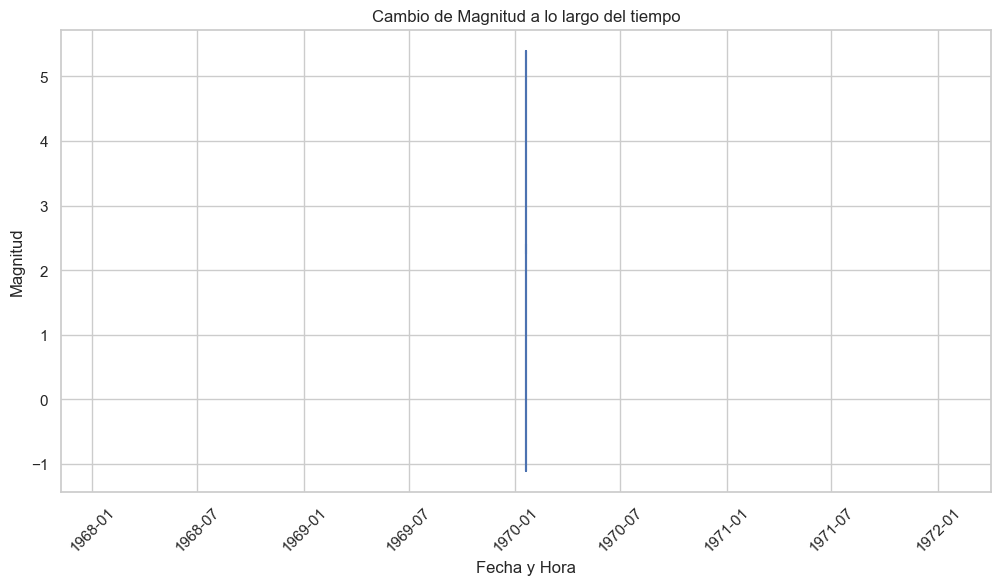

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Tamaño de la figura: 10 pulgadas de ancho y 6 pulgadas de alto

plt.plot(usa_df['Fecha del sismo'], usa_df['Magnitud'])
plt.xlabel('Fecha y Hora')
plt.ylabel('Magnitud')
plt.title('Cambio de Magnitud a lo largo del tiempo')
plt.xticks(rotation=45)

plt.show()



**Vamos analizar los sismos del Lugar por Magnitud**.

In [ ]:
conteo_valores = usa_df.groupby('Lugar')['Magnitud'].count()
conteo_valores.head()

Lugar
0km WSW of Brawley, CA                      1
1 km ESE of Los Reyes de Salgado, Mexico    1
1 km ESE of Panaca, Nevada                  1
1 km SE of Guánica, Puerto Rico             1
10 km E of P?hala, Hawaii                   2
Name: Magnitud, dtype: int64

In [ ]:
promedio_puntaje = usa_df.groupby('Lugar')['Magnitud'].mean()
promedio_puntaje.head()

Lugar
0km WSW of Brawley, CA                      1.450
1 km ESE of Los Reyes de Salgado, Mexico    4.300
1 km ESE of Panaca, Nevada                  0.900
1 km SE of Guánica, Puerto Rico             2.500
10 km E of P?hala, Hawaii                   1.815
Name: Magnitud, dtype: float64

**1. Análisis de variables numéricas:**

Analizamos Cantidad se Sismos

Estadísticas descriptivas básicas:

In [ ]:
import numpy as np

magnitudes = usa_df["Magnitud"]

mean = np.mean(magnitudes)
median = np.median(magnitudes)
std = np.std(magnitudes)
min_val = np.min(magnitudes)
max_val = np.max(magnitudes)

print("Media:", mean)
print("Mediana:", median)
print("Desviación estándar:", std)
print("Mínimo:", min_val)
print("Máximo:", max_val)


Media: 1.7512949643405276
Mediana: 1.6
Desviación estándar: 1.1297270533522643
Mínimo: -1.1
Máximo: 5.4


Representamos la distribución de magnitudes:

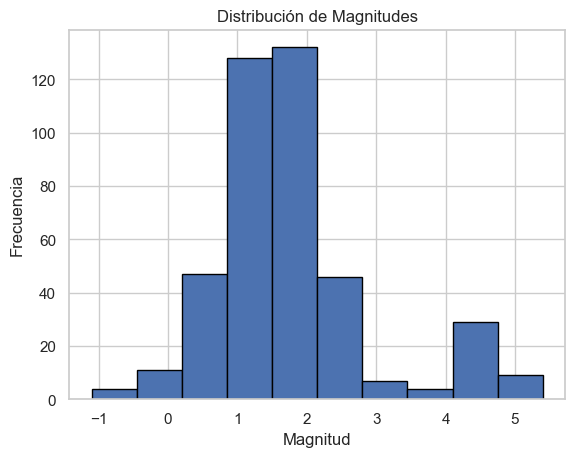

In [ ]:
import matplotlib.pyplot as plt

plt.hist(magnitudes, bins=10, edgecolor='black')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Magnitudes')
plt.show()


Graficamos Histograma de Magnitud con una línea de densidad (kde) que muestra la estimación de la distribución de magnitudes.

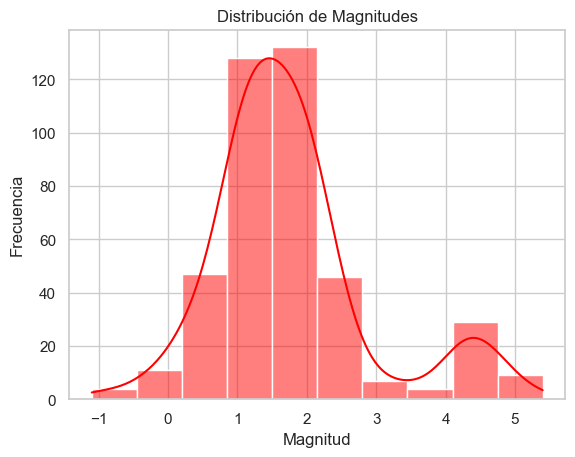

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=usa_df, x='Magnitud', bins=10, kde=True, color='red')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Magnitudes')
plt.show()



Verificamos el conteo de la Magnitud de los Sismos y visualizamos con un gráfico de caja (boxplot) y un diagrama de violín.

In [ ]:
df_Magnitud= usa_df.groupby('Magnitud').size().reset_index(name='count')
df_Magnitud.head()

,Magnitud,count
0,-1.10,1
1,-0.95,1
2,-0.85,1
3,-0.56,1
4,-0.41,1


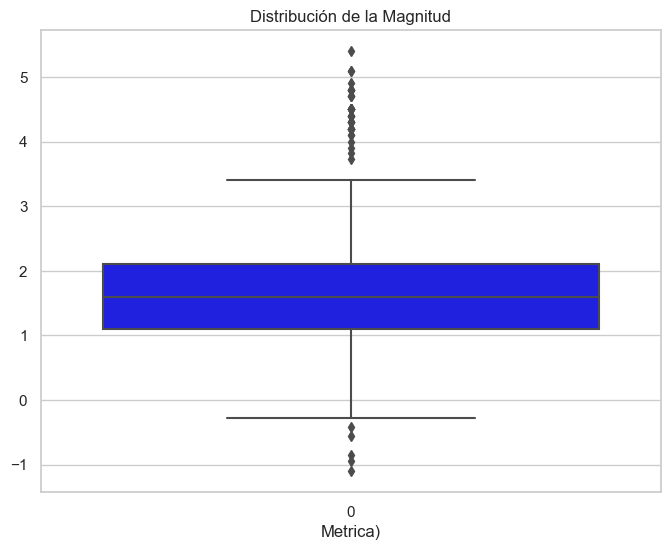

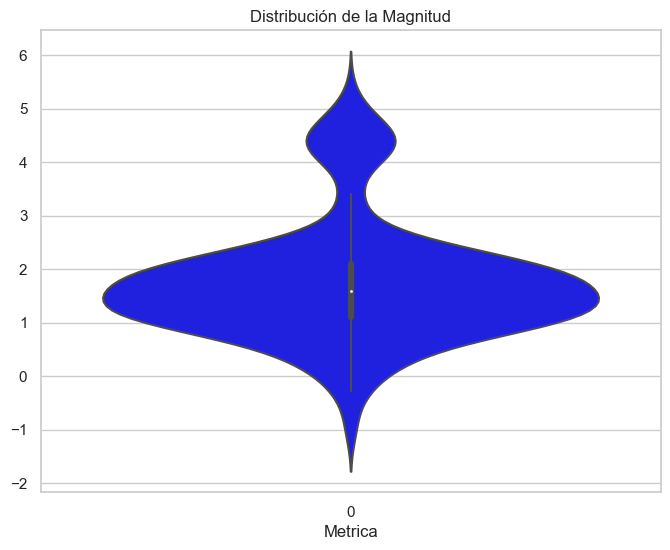

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar la columna de duración del curso
duration_data = usa_df['Magnitud']

# Configurar el estilo de los gráficos de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de caja (boxplot) de la magnitud del curso
plt.figure(figsize=(8, 6))
sns.boxplot(data=duration_data, color='blue')
plt.title('Distribución de la Magnitud')
plt.xlabel('Metrica)')
plt.ylabel('')

# Mostrar el gráfico de caja (boxplot)
plt.show()

# Crear un diagrama de violín de la duración del curso
plt.figure(figsize=(8, 6))
sns.violinplot(data=duration_data, color='blue')
plt.title('Distribución de la Magnitud')
plt.xlabel('Metrica')
plt.ylabel('')

# Mostrar el diagrama de violín
plt.show()

Hicimos un conteo de los tipos de catastrofes.

In [ ]:
df_Tipo_Catastrofe = usa_df.groupby('Tipo_Catastrofe').size().reset_index(name='count')
df_Tipo_Catastrofe.head()

,Tipo_Catastrofe,count
0,earthquake,408
1,explosion,4
2,ice quake,1
3,quarry blast,4


Obtuvimos los tipos de magnitudes únicos y su frecuencia:

In [ ]:
tipo_magnitud_counts = usa_df['Tipo_Magnitud'].value_counts()
print(tipo_magnitud_counts)


Tipo_Magnitud
ml     266
md     110
mb      37
mww      3
mw       1
Name: count, dtype: int64


Relación entre el tipo de magnitud y la profundidad.

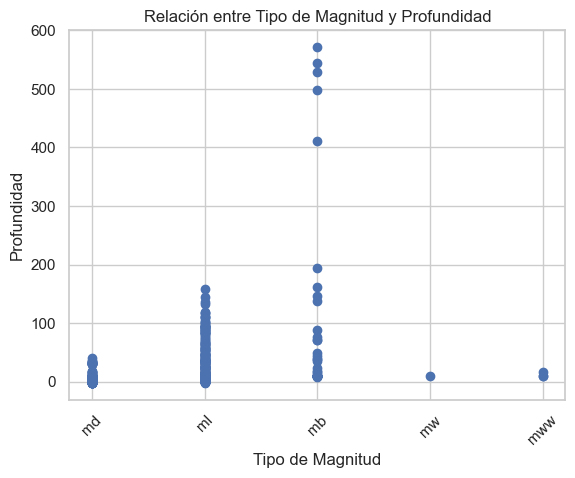

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(usa_df['Tipo_Magnitud'], usa_df['Profundidad'])
plt.xlabel('Tipo de Magnitud')
plt.ylabel('Profundidad')
plt.title('Relación entre Tipo de Magnitud y Profundidad')
plt.xticks(rotation=45)
plt.show()


Visualizamos el top 10 de los Sismos mas frecuentes

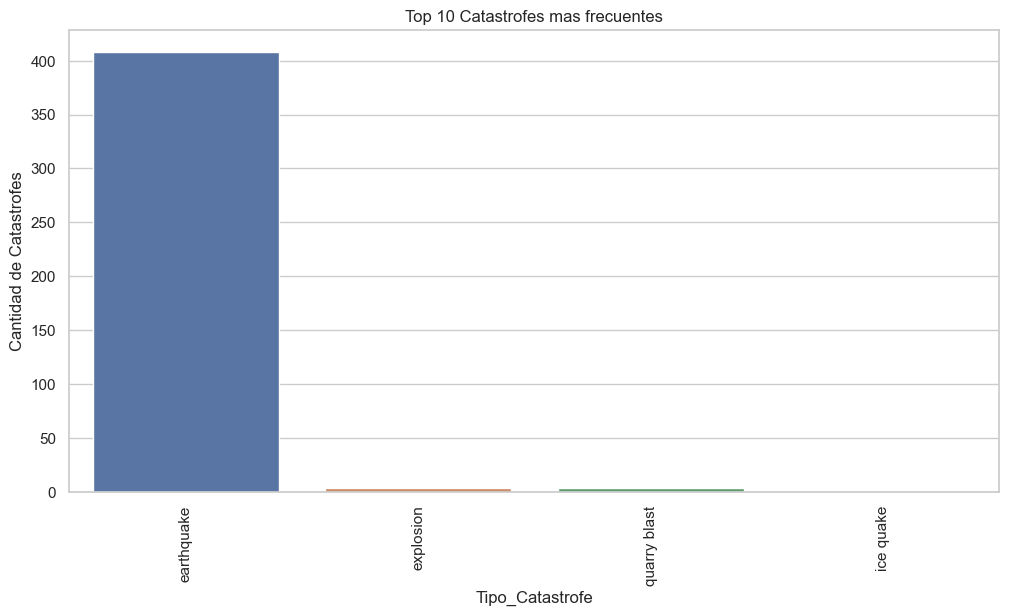

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar la columna de Tipo_Catastrofe
institution_data = usa_df['Tipo_Catastrofe']

# Contar la frecuencia de cada Tipo_Catastrofe
institution_counts = institution_data.value_counts()

# Seleccionar las N Tipo_Catastrofe más populares
top_n = 10  # Especifica el número de los Tipo_Catastrofe que deseas mostrar
top_institutions = institution_counts.head(top_n)

# Configurar el estilo de los gráficos de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras de los Tipo_Catastrofe más populares
plt.figure(figsize=(12, 6))
sns.barplot(x=top_institutions.index, y=top_institutions.values)
plt.title(f'Top {top_n} Catastrofes mas frecuentes')
plt.xlabel('Tipo_Catastrofe')
plt.ylabel('Cantidad de Catastrofes')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico de barras
plt.show()


In [ ]:
import plotly.express as px
import numpy as np

# Aplicar una transformación a los valores de profundidad para hacerlos positivos
positive_depth = np.abs(usa_df["Profundidad"])

# Crear un gráfico de dispersión en un mapa con la profundidad transformada
fig = px.scatter_mapbox(data_frame=usa_df, lat="Latitud", lon="Longitud", hover_name="Lugar",
                        color="Magnitud", size_max=10, zoom=3)

# Configurar el tamaño de los puntos de ubicación (medianos)
fig.update_traces(marker=dict(size=10))

# Configurar el tamaño de los puntos de profundidad
fig.add_trace(
    px.scatter_mapbox(data_frame=usa_df, lat="Latitud", lon="Longitud", hover_name="Lugar",
                      color="Magnitud", size=positive_depth, zoom=100).data[0])

# Configurar el diseño del mapa
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Distribución geográfica de eventos", height=500, width=800)

# Mostrar el gráfico interactivo
fig.show()

Nube de palabras Zonas con mas sismos.

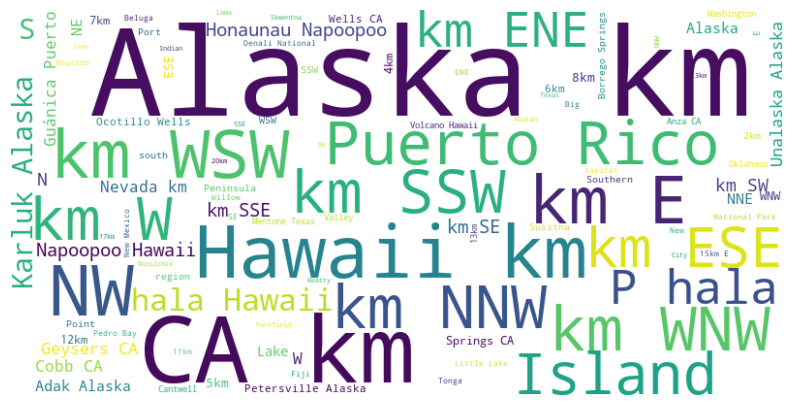

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Obtener una lista de todos los Lugares
titulos = usa_df['Lugar'].tolist()

# Unir todos los Lugares en un solo string
text = ' '.join(titulos)

# Crear el objeto de WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()